In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

import warnings
from copy import deepcopy
import gc
from collections import Counter

%matplotlib inline

In [2]:
%cd ../

/home/chervovn04/Programming/hackathons/2022/digital_breakout_885303


In [3]:
df = pd.read_csv("data/train.csv")

/tmp/ipykernel_51527/1366839329.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/train.csv")


In [4]:
df.head(3) 

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,N,0.0,Y,N,87.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,107.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962.0,Цех,7503.0,N,0.0,Y,N,50.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0


In [5]:
df.info(0) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   oper_type + oper_attr          object 
 2   index_oper                     object 
 3   type                           object 
 4   priority                       float64
 5   is_privatecategory             object 
 6   class                          float64
 7   is_in_yandex                   object 
 8   is_return                      object 
 9   weight                         float64
 10  mailtype                       float64
 11  mailctg                        float64
 12  mailrank                       float64
 13  directctg                      float64
 14  transport_pay                  float64
 15  postmark                       float64
 16  name_mfi                       object 
 17  weight_mfi                     float64
 18  pr

In [6]:
df.drop(columns=['mailrank'], inplace=True) 

In [7]:
df.index_oper = df.index_oper.replace(' ', '0').astype(float)

<AxesSubplot: >

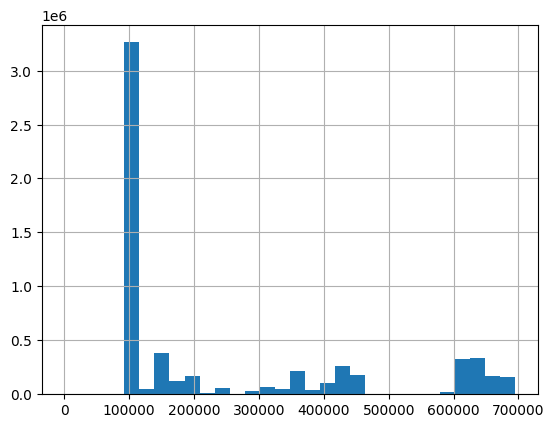

In [8]:
df.index_oper.hist(bins=30)

/tmp/ipykernel_51527/1032379179.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.abs(df.corr()), square = True)


<AxesSubplot: >

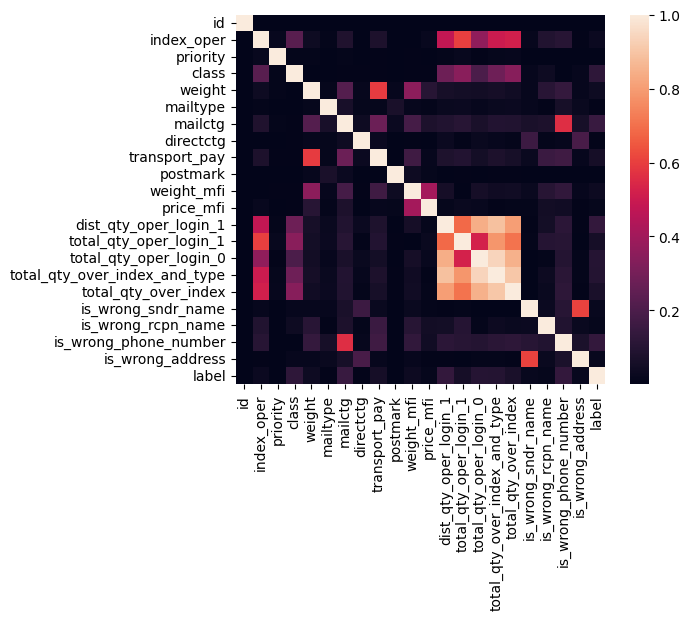

In [9]:
sns.heatmap(np.abs(df.corr()), square = True)

In [10]:
df.shape, df[np.abs(df.weight - df.weight_mfi) <= 10000].shape

((6000000, 28), (5999972, 28))

<AxesSubplot: >

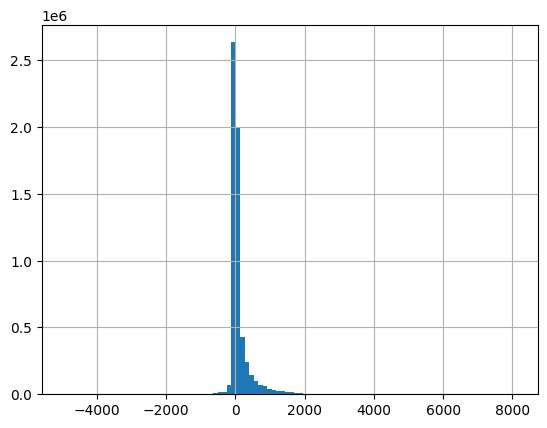

In [11]:
(df[np.abs(df.weight - df.weight_mfi) <= 10000].weight - df.weight_mfi).hist(bins=100)

In [17]:
df[['name_mfi', 'label']][df['label'] == 1].head(50)

,name_mfi,label
70,"sunglasses(HA-09-1-300),Peeler(YXX02)",1
152,mobile phone screen protector,1
164,Wallet Cases,1
167,"Fishing lure,fishing(7001-M012-Y)",1
176,Data Cables,1
182,Switch Cover,1
185,Interior Mouldings,1
205,0,1
261,Mobile Phone Cables,1
335,Stickers,1
